In [ ]:
# device level markov chain
import schemdraw
from schemdraw import flow
from PIL import Image

def autocrop(image_file):
    image = Image.open(image_file)
    image.crop(image.getbbox()).save(image_file)

schemdraw.config(inches_per_unit=2,fontsize=50)

with schemdraw.Drawing(file='fig/markov-segr.png') as d:
    d += (NOM := flow.State().label('NOM'))
    d += (FAIL := flow.State().label('FAIL').at((4,-4)))
    d += flow.Arc2(0.01,arrow='->').at(NOM.SE).to(FAIL.NW).label('$\lambda$')
autocrop('fig/markov-segr.png')

with schemdraw.Drawing(file='fig/markov-set.png') as d:
    d += (NOM := flow.State().label('NOM'))
    d += (SET := flow.State().label('EFF').at((4,0)))
    d += flow.Arc2(0.2,arrow='->').at(NOM.NE).to(SET.NW).label('$\lambda$')
    d += flow.Arc2(0.2,arrow='->').at(SET.SW).to(NOM.SE).label('$\mu$')
autocrop('fig/markov-set.png')

with schemdraw.Drawing(file='fig/markov-seb.png') as d:
    d += (NOM := flow.State().label('NOM'))
    d += (SEB := flow.State().label('EFF').at((0,-4)))
    d += flow.Arc2(0.2,arrow='->').at(NOM.SE).to(SEB.NE).label('$\lambda_1$')
    d += flow.Arc2(0.2,arrow='->').at(SEB.NW).to(NOM.SW).label('$\mu_1$')
    d += (FAIL := flow.State().label('FAIL').at((4,-4)))
    d += flow.Arc2(0.2,arrow='->').at(SEB.NE).to(FAIL.NW).label('$\lambda_2$')
autocrop('fig/markov-seb.png')

with schemdraw.Drawing(file='fig/markov-tid.png') as d:
    d += (NOM := flow.State().label('NOM'))
    d += (FAIL := flow.State().label('FAIL').at((4,-4)))
    d += flow.Arc2(0.01,arrow='->').at(NOM.SE).to(FAIL.NW).label('$\lambda$')
autocrop('fig/markov-tid.png')

with schemdraw.Drawing(file='fig/markov-comp.png') as d:
    d += (NOM := flow.State(fill='white').label('NOM'))
    d += (SET := flow.State(fill='lightgray').label('SET').at((5,0)))
    d += flow.Arc2(0.2,arrow='->').at(NOM.NE).to(SET.NW).label('$\lambda_{SET}$')
    d += flow.Arc2(0.2,arrow='->').at(SET.W).to(NOM.E).label('$\mu_{SET}$')
    d += (SEB := flow.State(fill='lightgray').label('SEB').at((0,-5)))
    d += flow.Arc2(0.2,arrow='->').at(NOM.S).to(SEB.N).label('$\lambda_{SEB}$')
    d += flow.Arc2(0.2,arrow='->').at(SEB.NW).to(NOM.SW).label('$\mu_{SEB}$')
    d += flow.Arc2(-0.2,arrow='->').at(SET.SW).to(SEB.NE).label('$\lambda_{SEB}$')
    d += (FAIL := flow.State(fill='lightgray').label('FAIL').at((5,-5)))
    d += flow.Arc2(0.2,arrow='->').at(NOM.SE).to(FAIL.NW).label('$\lambda_{SEGR} + \lambda_{TID}$')
    d += flow.Arc2(0.2,arrow='->').at(SEB.E).to(FAIL.W).label('$\lambda_{BURN}$')
    d += flow.Arc2(0.2,arrow='->').at(SET.SE).to(FAIL.NE).label('$\lambda_{SEGR} + \lambda_{TID}$')
    d += flow.Arc2(-0.2,arrow='->').at(SEB.SE).to(FAIL.SW).label('$\lambda_{SEGR} + \lambda_{TID}$')
autocrop('fig/markov-comp.png')

with schemdraw.Drawing(file='fig/symbol-comp.png') as d:
    d += (Q := flow.Circle().label('Q'))
    d += flow.Arrow().at(Q.N).up().label('Fault (T/F)\nP(Fault)\n$\lambda_{Fault}$',fontsize=35)
autocrop('fig/symbol-comp.png')

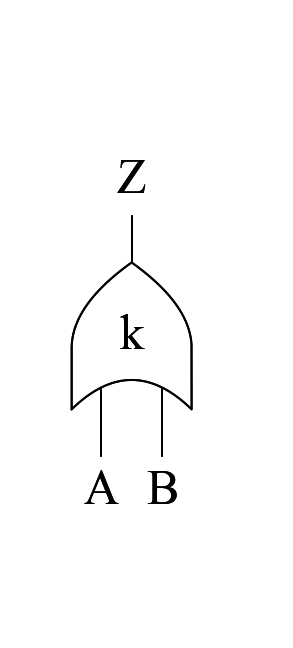

NameError: name 'Image' is not defined

In [10]:
import schemdraw
from schemdraw import flow,logic,elements
def autocrop(image_file):
    image = Image.open(image_file)
    image.crop(image.getbbox()).save(image_file)

schemdraw.config(inches_per_unit=2,fontsize=50,font='Times New Roman')
with schemdraw.Drawing(file='fig/symbol.png') as d:
    d += (G := logic.Or().down().reverse().label('k  ',loc='center'))
    d += flow.Line().at(G.out).up(d.unit/100).label('Z','right')
    d += flow.Line().at(G.in2).down(d.unit/100).label('A','left')
    d += flow.Line().at(G.in1).down(d.unit/100).label('B','left')
autocrop('fig/symbol.png')

In [4]:
# DFT gate symbol definitions
import schemdraw
from schemdraw import logic,segments,elements

class Pand(elements.Element):
    def __init__(self, dot=False, label=False, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments = logic.And(**kwargs).segments
        self.anchors = logic.And(**kwargs).anchors
        self.segments.append(segments.Segment([(0.35,0.5),(1.5,0)]))
        self.segments.append(segments.Segment([(0.35,-0.5),(1.5,0)]))
        if label: self.segments.append(segments.SegmentText((0.5,0),'PAND',fontsize=35))
        if dot: self.segments.append(segments.SegmentCircle((0.5,-0.3),0.02,fill=True))

class Spare(elements.Element):
    def __init__(self, dot=False, label=False, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments = logic.And(**kwargs).segments[1:]
        self.anchors = logic.And(**kwargs).anchors
        self.segments.append(segments.SegmentPoly([(0.35,0.75),(1.5,0.75),(1.5,-0.75),(0.35,-0.75)]))
        self.segments.append(segments.SegmentPoly([(0.35,0.75),(0.9,0.75),(0.9,0),(0.35,0)]))
        self.segments.append(segments.Segment([(1.1,0.75),(1.1,-0.75)]))
        if label: self.segments.append(segments.SegmentText((1.25,0),'SPARE',fontsize=35))

class Fdep(elements.Element):
    def __init__(self, dot=False, label=False, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments = logic.And(**kwargs).segments[1:]
        self.anchors = logic.And(**kwargs).anchors
        self.segments.append(segments.SegmentPoly([(0.35,0.75),(1.5,0.75),(1.5,-0.75),(0.35,-0.75)]))
        self.segments.append(segments.SegmentPoly([(0.35,-0.75),(1.1,-0.75),(0.725,0)]))
        self.segments.append(segments.Segment([(1.1,0.75),(1.1,-0.75)]))
        self.segments.append(segments.Segment([(0.725,-0.75),(0.725,-1)]))
        self.anchors['trig'] = (0.725,-1)
        if label: self.segments.append(segments.SegmentText((1.25,0),'FDEP',fontsize=35))

class Seq(elements.Element):
    def __init__(self, dot=False, label=False, *d, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments = logic.And(**kwargs).segments[1:]
        self.anchors = logic.And(**kwargs).anchors
        self.segments.append(segments.SegmentPoly([(0.35,0.75),(1.5,0.75),(1.5,-0.75),(0.35,-0.75)]))
        self.segments.append(segments.Segment([(1.1,0.75),(1.1,-0.75)]))
        if label: self.segments.append(segments.SegmentText((1.25,0),'SEQ',fontsize=35))
        if dot: self.segments.append(segments.SegmentCircle((0.5,-0.6),0.02,fill=True))

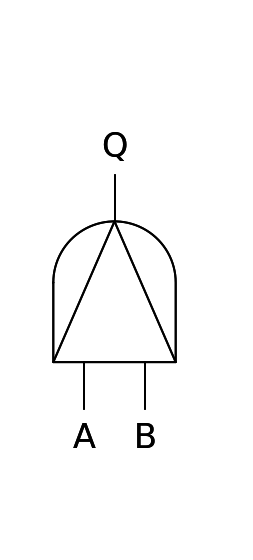

NameError: name 'Image' is not defined

In [17]:
# DFT gate symbol samples
import schemdraw
from schemdraw import flow,logic

def autocrop(image_file):
    image = Image.open(image_file)
    image.crop(image.getbbox()).save(image_file)

schemdraw.config(inches_per_unit = 2,fontsize=35)

with schemdraw.Drawing(file='fig/symbol-pand.png') as d:
    d += (G := Pand().down().reverse())
    d += flow.Line().at(G.out).up(d.unit/100).label('Q','right')
    d += flow.Line().at(G.in2).down(d.unit/100).label('A','left')
    d += flow.Line().at(G.in1).down(d.unit/100).label('B','left')
autocrop('fig/symbol-pand.png')

with schemdraw.Drawing(file='fig/symbol-spare.png') as d:
    d += (G := Spare().down().reverse())
    d += flow.Line().at(G.out).up(d.unit/100).label('Q','right')
    d += flow.Line().at(G.in2).down(d.unit/100).label('A','left')
    d += flow.Line().at(G.in1).down(d.unit/100).label('B','left')
autocrop('fig/symbol-spare.png')

with schemdraw.Drawing(file='fig/symbol-fdep.png') as d:
    d += (G := Fdep().down().reverse())
    d += flow.Line().at(G.out).up(d.unit/100).label('Q','right')
    d += flow.Line().at(G.in2).down(d.unit/100).label('A','left')
    d += flow.Line().at(G.in1).down(d.unit/100).label('B','left')
    d += flow.Line().at(G.trig).left(d.unit/100).label('$\\tau$','left')
autocrop('fig/symbol-fdep.png')

with schemdraw.Drawing(file='fig/symbol-seq.png') as d:
    d += (G := Seq().down().reverse())
    d += flow.Line().at(G.out).up(d.unit/100).label('Q','right')
    d += flow.Line().at(G.in2).down(d.unit/100).label('A','left')
    d += flow.Line().at(G.in1).down(d.unit/100).label('B','left')
autocrop('fig/symbol-seq.png')

In [ ]:
# markov-and.png
import schemdraw
from schemdraw import flow

schemdraw.config(inches_per_unit = 2,fontsize=50)
with schemdraw.Drawing(file='fig/markov-and.png') as d:
    d += (S1 := flow.State().label('0,0\nFalse'))

    d += (S2 := flow.State().label('1,0\nFalse').at((3,3)))
    d += flow.Arc2(0.2,arrow='->').at(S1.N).to(S2.W).label('$\lambda_{Q1}$\n')
    d += flow.Arc2(0.2,arrow='->').at(S2.S).to(S1.E).label('$\mu_{Q1}$')

    d += (S3 := flow.State().label('0,1\nFalse').at((3,-3)))
    d += flow.Arc2(-0.2,arrow='->').at(S1.S).to(S3.W).label('$\lambda_{Q2}$')
    d += flow.Arc2(-0.2,arrow='->').at(S3.N).to(S1.E).label('$\mu_{Q2}$')

    d += (S4 := flow.State().label('1,1\nTrue').at((6,0)))
    d += flow.Arc2(0.2,arrow='->').at(S2.E).to(S4.N).label('$\lambda_{Q2}$')
    d += flow.Arc2(0.2,arrow='->').at(S4.W).to(S2.S).label('$\mu_{Q2}$')
    d += flow.Arc2(-0.2,arrow='->').at(S3.E).to(S4.S).label('$\lambda_{Q1}$')
    d += flow.Arc2(-0.2,arrow='->').at(S4.W).to(S3.N).label('$\mu_{Q1}$')


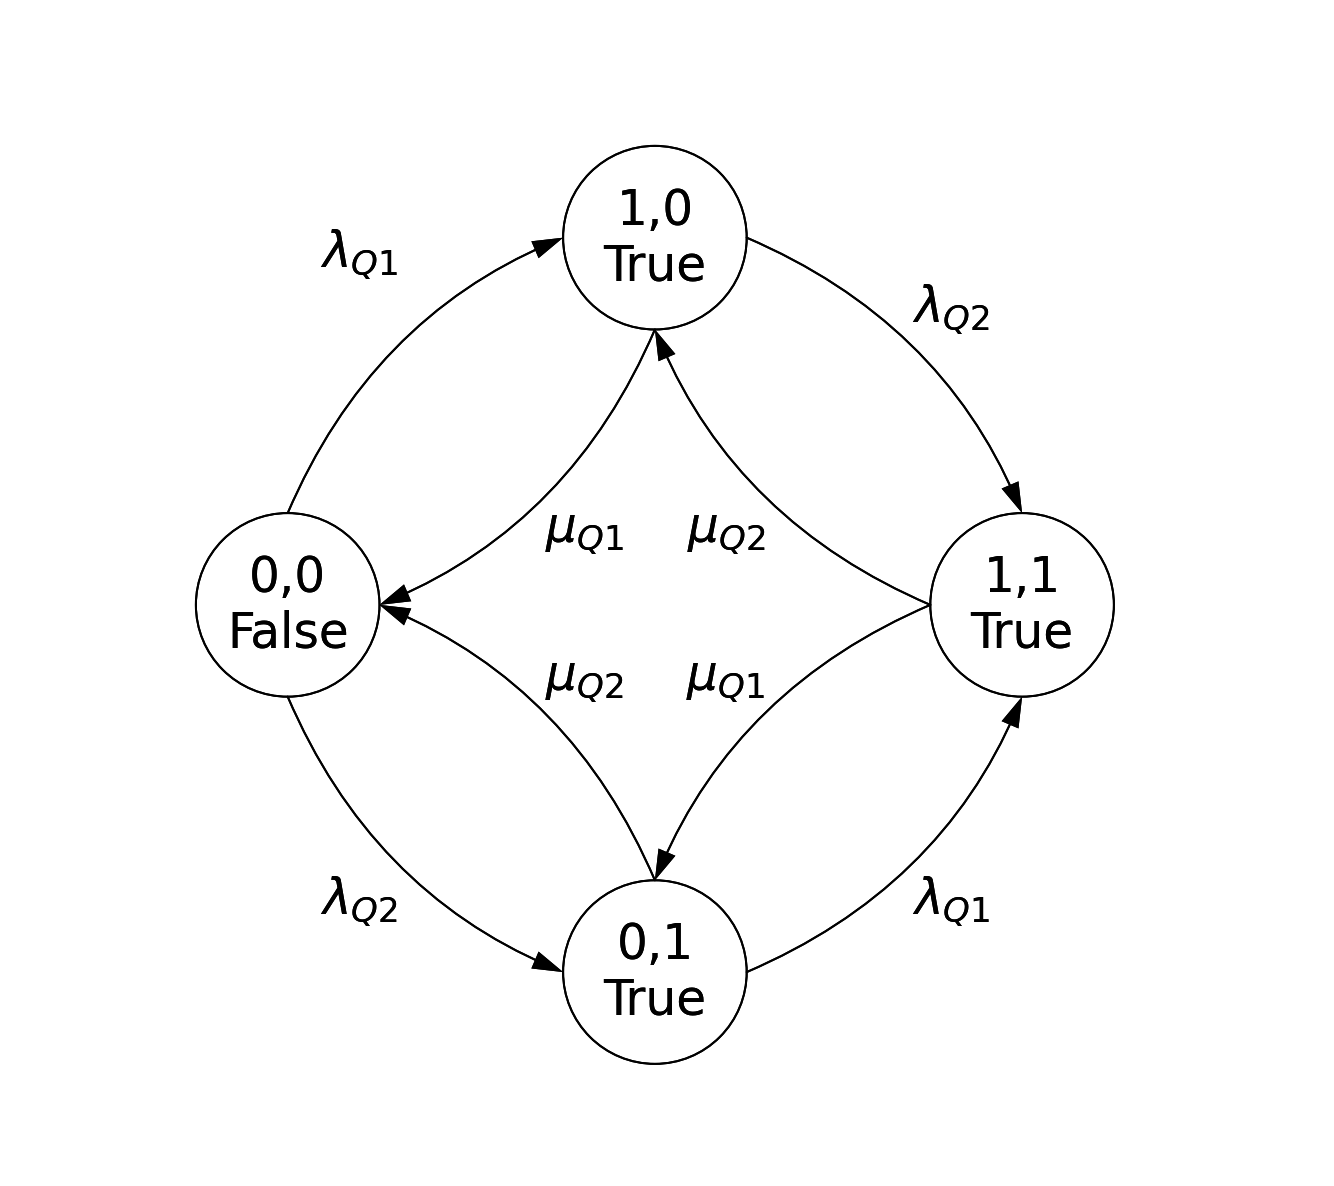

In [2]:
# markov-or.png
import schemdraw
from schemdraw import flow

schemdraw.config(inches_per_unit = 2,fontsize=50)
with schemdraw.Drawing(file='fig/markov-or.png') as d:
    d += (S1 := flow.State().label('0,0\nFalse'))

    d += (S2 := flow.State().label('1,0\nTrue').at((3,3)))
    d += flow.Arc2(0.2,arrow='->').at(S1.N).to(S2.W).label('$\lambda_{Q1}$\n')
    d += flow.Arc2(0.2,arrow='->').at(S2.S).to(S1.E).label('$\mu_{Q1}$')

    d += (S3 := flow.State().label('0,1\nTrue').at((3,-3)))
    d += flow.Arc2(-0.2,arrow='->').at(S1.S).to(S3.W).label('$\lambda_{Q2}$')
    d += flow.Arc2(-0.2,arrow='->').at(S3.N).to(S1.E).label('$\mu_{Q2}$')

    d += (S4 := flow.State().label('1,1\nTrue').at((6,0)))
    d += flow.Arc2(0.2,arrow='->').at(S2.E).to(S4.N).label('$\lambda_{Q2}$')
    d += flow.Arc2(0.2,arrow='->').at(S4.W).to(S2.S).label('$\mu_{Q2}$')
    d += flow.Arc2(-0.2,arrow='->').at(S3.E).to(S4.S).label('$\lambda_{Q1}$')
    d += flow.Arc2(-0.2,arrow='->').at(S4.W).to(S3.N).label('$\mu_{Q1}$')


In [1]:
# markov-pand.png
schemdraw.config(inches_per_unit = 2,fontsize=50)
with schemdraw.Drawing(file='fig/markov-pand.png') as d:
    d += (S1 := flow.State().label('0,0\nFalse'))

    d += (S2 := flow.State().label('1,0\nFalse').at((3,2)))
    d += flow.Arc2(0.2,arrow='->').at(S1.N).to(S2.NW).label('$\lambda_{Q1}$\n')
    d += flow.Arc2(0.2,arrow='->').at(S2.SW).to(S1.E).label('$\mu_{Q1}$')

    d += (S3 := flow.State().label('0,1\nFalse').at((3,-2)))
    d += flow.Arc2(-0.2,arrow='->').at(S1.S).to(S3.W).label('$\lambda_{Q2}$')
    d += flow.Arc2(-0.2,arrow='->').at(S3.NW).to(S1.E).label('$\mu_{Q2}$')

    d += (S4 := flow.State().label('1,1\nTrue').at((6,2)))
    d += flow.Arc2(0.2,arrow='->').at(S2.NE).to(S4.NW).label('$\lambda_{Q2}$')
    d += flow.Arc2(0.2,arrow='->').at(S4.SW).to(S2.SE).label('$\mu_{Q2}$')

    d += (S5 := flow.State().label('1,1\nFalse').at((6,-2)))
    d += flow.Arc2(-0.2,arrow='->').at(S3.SE).to(S5.SW).label('$\lambda_{Q1}$')
    d += flow.Arc2(-0.2,arrow='->').at(S5.NW).to(S3.NE).label('$\mu_{Q1}$')


NameError: name 'schemdraw' is not defined

In [ ]:
# markov-seq.png
schemdraw.config(inches_per_unit = 2,fontsize=50)
with schemdraw.Drawing(file='fig/markov-seq.png') as d:
    d += (S1 := flow.State().label('0,0\nFalse'))

    d += (S2 := flow.State().label('1,0\nFalse').at((3,0)))
    d += flow.Arc2(0.2,arrow='->').at(S1.NE).to(S2.NW).label('$\lambda_{Q1}$\n')
    d += flow.Arc2(0.2,arrow='->').at(S2.SW).to(S1.SE).label('$\mu_{Q1}$')

    d += (S3 := flow.State().label('1,1\nTrue').at((6,0)))
    d += flow.Arc2(0.2,arrow='->').at(S2.NE).to(S3.NW).label('$\lambda_{Q2}$')
    d += flow.Arc2(0.2,arrow='->').at(S3.SW).to(S2.SE).label('$\mu_{Q2}$')

In [ ]:
# system-X.png
import schemdraw
from schemdraw import flow,logic
from lxml import etree
from PIL import Image

file = 'system-3'
system = etree.parse('sys/'+file+'.xml')    

spacing = (3,4)
pos = {}

def get_pos(sys):
    global pos
    if sys not in pos.keys():
        x = [get_pos(child)[0] for child in sys.xpath('*')]
        y = [get_pos(child)[1] for child in sys.xpath('*')]
        pos[sys] = (sum(x) / len(x), max(y) + spacing[1])
    return pos[sys]

for i,event in enumerate(system.xpath('.//event')):
    pos[event] = (i * spacing[0],-spacing[1] * len(event.xpath('ancestor::node')))
get_pos(system.getroot())

schemdraw.config(inches_per_unit = 2,fontsize=45)
with schemdraw.Drawing(file='fig/'+file+'.png') as d:
    for event in system.xpath('..//event'):
        d += flow.Circle().anchor('N').at(pos[event]).label(event.get('name'))
    for sys in system.xpath('..//node'):
        if sys.get('gate',None) == 'OR':
            d += (new := flow.Box(h=1).anchor('N').at(pos[sys]).label(sys.get('name')))
            d += (new := logic.Or(inputs=1).at(new.S).down().reverse())
        if sys.get('gate',None) == 'AND':
            d += (new := flow.Box(h=1).anchor('N').at(pos[sys]).label(sys.get('name')))
            d += (new := logic.And(inputs=1).at(new.S).down().reverse())
        for sub in sys.xpath('*'):
            d += flow.Wire('-|').at(new.in1).to(pos[sub])
image = Image.open('fig/'+file+'.png')
image.crop(image.getbbox()).save('fig/'+file+'.png')


In [ ]:
# generate effect rate time series
import numpy as np
import plotly.express as px
import pandas as pd

def risk(t,t0,ysat,alpha,beta,shuffle=0):
    if shuffle:
        t0 = t0 * (1 + np.random.rand() * shuffle - shuffle/2)
        ysat = ysat * (1 + np.random.rand() * shuffle - shuffle/2)
        alpha = alpha * (1 + np.random.rand() * shuffle - shuffle/2)
        beta = beta * (1 + np.random.rand() * shuffle - shuffle/2)
    y = ysat * -(np.exp(-alpha * (t - t0)) - np.exp(-beta * (t - t0)))
    y += ysat * -(np.exp(-alpha * (max(t) - (t + t0))) - np.exp(-beta * (max(t) - (t + t0))))
    y[y < 0] = 0
    return y

t = np.linspace(0,12,4320) # 12 hr = 43200 s

df = pd.DataFrame(index=pd.Index(t,name='time'))
for label in ['A','B','C','D','E']:
    sat = 1e-4
    if label.split('-')[-1] in ['SEB']: sat = 1e-4
    if label.split('-')[-1] in ['SEGR']: sat = 1e-5
    df[label] = risk(t,1,sat,10,0.5,shuffle=0.5)
df['F'] = np.power(t,10)
df['F'] = df['F'] / max(df['F']) * sat
df['F'].loc[df['F'] <= sat/1000] = 0
df.to_csv('data/rates.csv')

fig = px.line(df,labels={'value':'Rate (/s)','time':'Time (hr)','variable':'Event'},log_y=True,template='plotly_white')
#fig.write_image('fig/rates.png',scale=2)
fig.show()

In [ ]:
# fault tree monte carlo simulation
import numpy as np
from lxml import etree
import pandas as pd
from copy import copy
from datetime import datetime

def propagate(node):
    parents = node.xpath('..//node')
    for parent in parents: parent.set('fault','None')
    while len(parents) > 0:
        for parent in parents:
            child_faults = [child.get('fault') for child in parent]
            if 'None' in child_faults: continue
            child_faults = [fault == 'True' for fault in child_faults]
            if parent.get('gate') == 'OR': parent_fault = any(child_faults)
            elif parent.get('gate') == 'AND': parent_fault = all(child_faults)
            elif parent.get('gate') == 'VOTE': parent_fault = sum(child_faults) >= int(parent.get('k'))
            parent.set('fault',str(parent_fault))
            parents.pop(parents.index(parent))

def simulate(tree,rates,N=1):
    rates = rates[[event.get('name') for event in tree.xpath('..//event')]]
    time = np.linspace(min(rates.index),max(rates.index),len(rates)) # 12 hr = 43200 s
    step = (max(rates.index) - min(rates.index)) / len(rates)
    probs = 1 - np.exp(-(rates.to_numpy()) * step) # get all the probabilities

    DF = pd.DataFrame()
    for n in range(N):
        result = etree.Element('result')
        timeline = etree.Element('timeline')
        initial = etree.Element('initial')
        initial.append(copy(tree.getroot()))
        root = copy(tree.getroot())
        nodes = root.xpath('.//node')
        events = root.xpath('.//event')
        faults = np.random.rand(*probs.shape) < probs # get all the faults
        
        for i,t in enumerate(time):
            for event,fault,prob in zip(events,faults[i],probs[i]):
                event.set('prob',str(prob))
                if t >= float(event.get('repair','0')): event.set('fault',str(fault))
                else: event.set('fault','True')
                if fault: event.set('repair',str(t + float(event.get('delay','0')) / 3600))
            propagate(root) # propagate faults
            new = copy(root)
            new.set('time',str(t))
            timeline.append(new)

        final = etree.Element('final')
        final.append(copy(root))
        result.append(initial)
        result.append(final)
        result.append(timeline)
        result = etree.ElementTree(result)
        result.write('data/result.xml')
        df = pd.read_xml(etree.tostring(timeline),xpath='.//*')
        df = df[['time','name','fault']].fillna(method='pad')
        df = df.pivot(index='time',columns='name',values='fault').astype(int)
        if n == 0: DF = df
        else: DF += df
    return DF

In [ ]:
# run simulation
from lxml import etree
import pandas as pd
tree = etree.parse('sys/system-3.xml')
rates = pd.read_csv('data/rates.csv',index_col='time')

N = 100
result = simulate(tree,rates,N)
print(result)
print(result.sum())
result.to_csv('data/result.csv')

In [ ]:
from copy import copy

from radstats import bayes

def analyze(tree,rates,N=1):
    rates = rates[[event.get('name') for event in tree.xpath('..//event')]]
    time = np.linspace(min(rates.index),max(rates.index),len(rates)) # 12 hr = 43200 s
    step = (max(rates.index) - min(rates.index)) / len(rates)
    probs = 1 - np.exp(-rates * step)
    nodes = copy(tree.xpath('..//node'))
    while len(nodes) > 0:
        for node in nodes:
            children = [child.get('name') for child in node]
            if all([child in probs.columns for child in children]):
                if node.get('gate') == 'OR':
                    probs[node.get('name')] = probs.apply(lambda x: bayes.OR(x[children]),axis=1)
                if node.get('gate') == 'AND':
                    probs[node.get('name')] = probs.apply(lambda x: bayes.AND(x[children]),axis=1)
                if node.get('gate') == 'VOTE':
                    probs[node.get('name')] = probs.apply(lambda x: bayes.VOTE(x[children],int(node.get('k'))),axis=1)
                nodes.remove(node)
    rates = -np.log(1 - probs) / step
    rates[rates < (10 ** -bayes.decimals)] = 0
    return rates,probs

from lxml import etree
import pandas as pd
tree = etree.parse('sys/system-4.xml')
rates = pd.read_csv('data/rates.csv',index_col='time')
Rate,Prob = analyze(tree,rates)
print(Rate)
print(Prob)

In [ ]:
# plot simulation results
import plotly.express as px

fig = px.imshow((1 - Rate).T,height=100+30*len(Rate.columns),labels={'y':'Element','x':'Time (hr)','color':'1-Rate'})
fig.update_traces(showscale=False).show()

fig = px.imshow((1 - Prob).T,height=100+30*len(Prob.columns),labels={'y':'Element','x':'Time (hr)','color':'1-Prob'})
fig.update_traces(showscale=False).show()

# fig = px.bar(result.mean()/len(result),labels={'value':'Unavailability','name':'Element'})
# fig.update_layout(showlegend=False).show()

In [ ]:
import schemdraw
from schemdraw import flow,logic,elements
from PIL import Image

file = 'fig/temp_event.png'

x,y = 2,2
with schemdraw.Drawing(file=file,show=False) as d:
    d += (box := flow.Box(h=1).anchor('S').at((4*x,2*y)).label('A'))
    d += (gate := logic.And(inputs=1).at(box.S).down().reverse())

    d += (bub := flow.State().anchor('S').at((x,0)).label('$p_{t-t_P}$'))
    d += flow.Wire('|-').at(bub.N).to(gate.in1)
    d += flow.State(lw=0).anchor('S').at((2*x,0)).label('. . .')
    d += (bub := flow.State().anchor('S').at((3*x,0)).label('$p_{t-1}$'))
    d += flow.Wire('|-').at(bub.N).to(gate.in1)
    d += (bub := flow.State().anchor('S').at((4*x,0)).label('$p_t$'))
    d += flow.Wire('|-').at(bub.N).to(gate.in1)
image = Image.open(file)
image.crop(image.getbbox())
image.save(file)
image

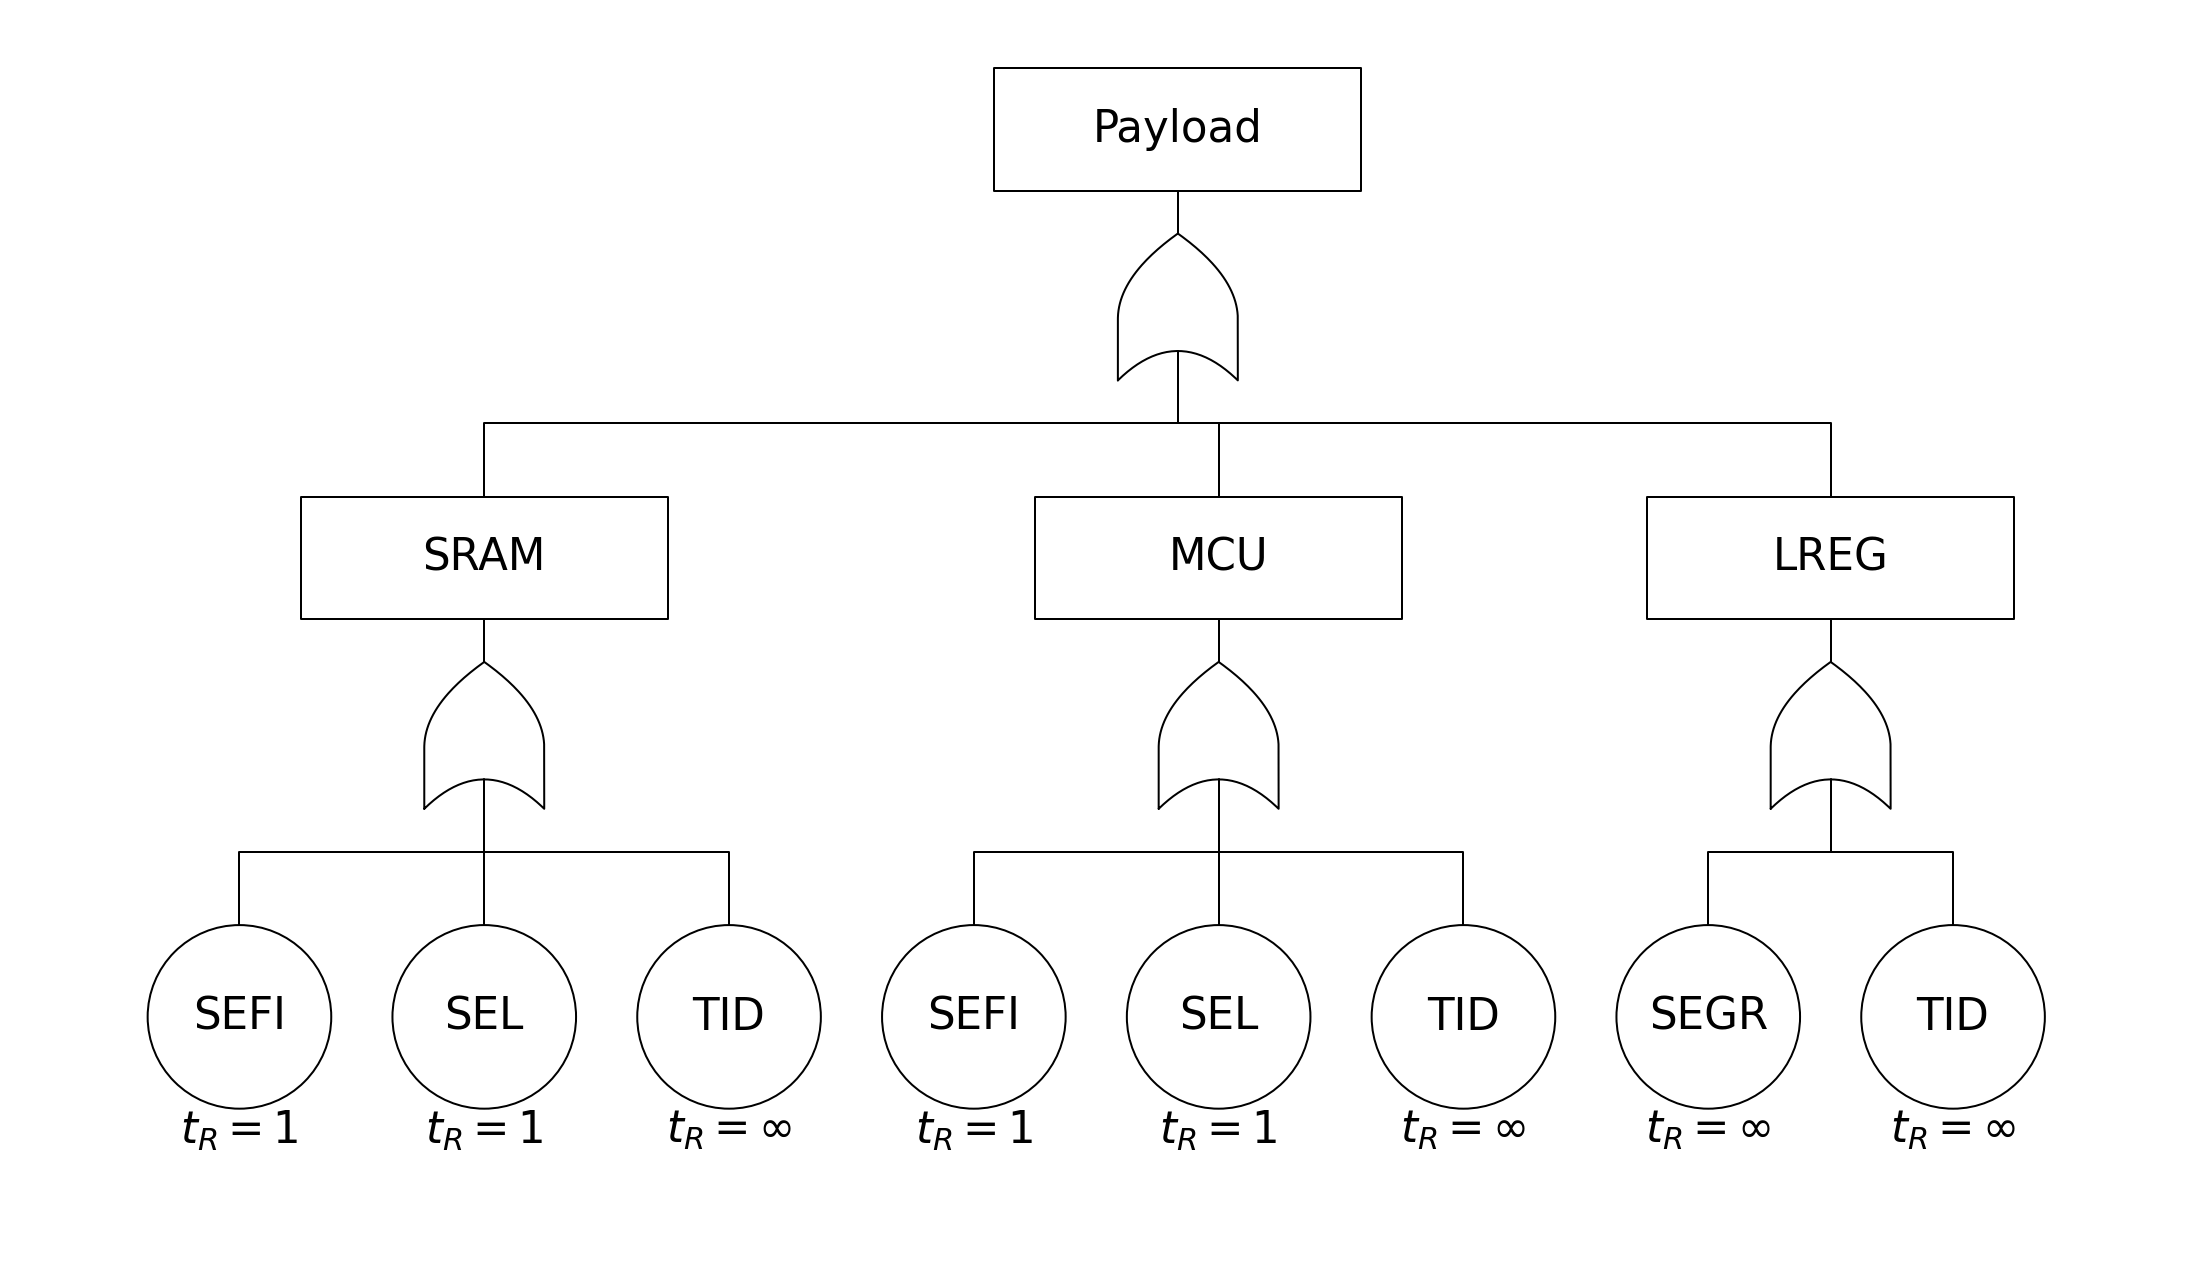

In [1]:
from lxml import etree
from radstats import diagram

system = etree.parse('sys/sramsat.xml')
diagram.FT(system,'fig/diagram.png')

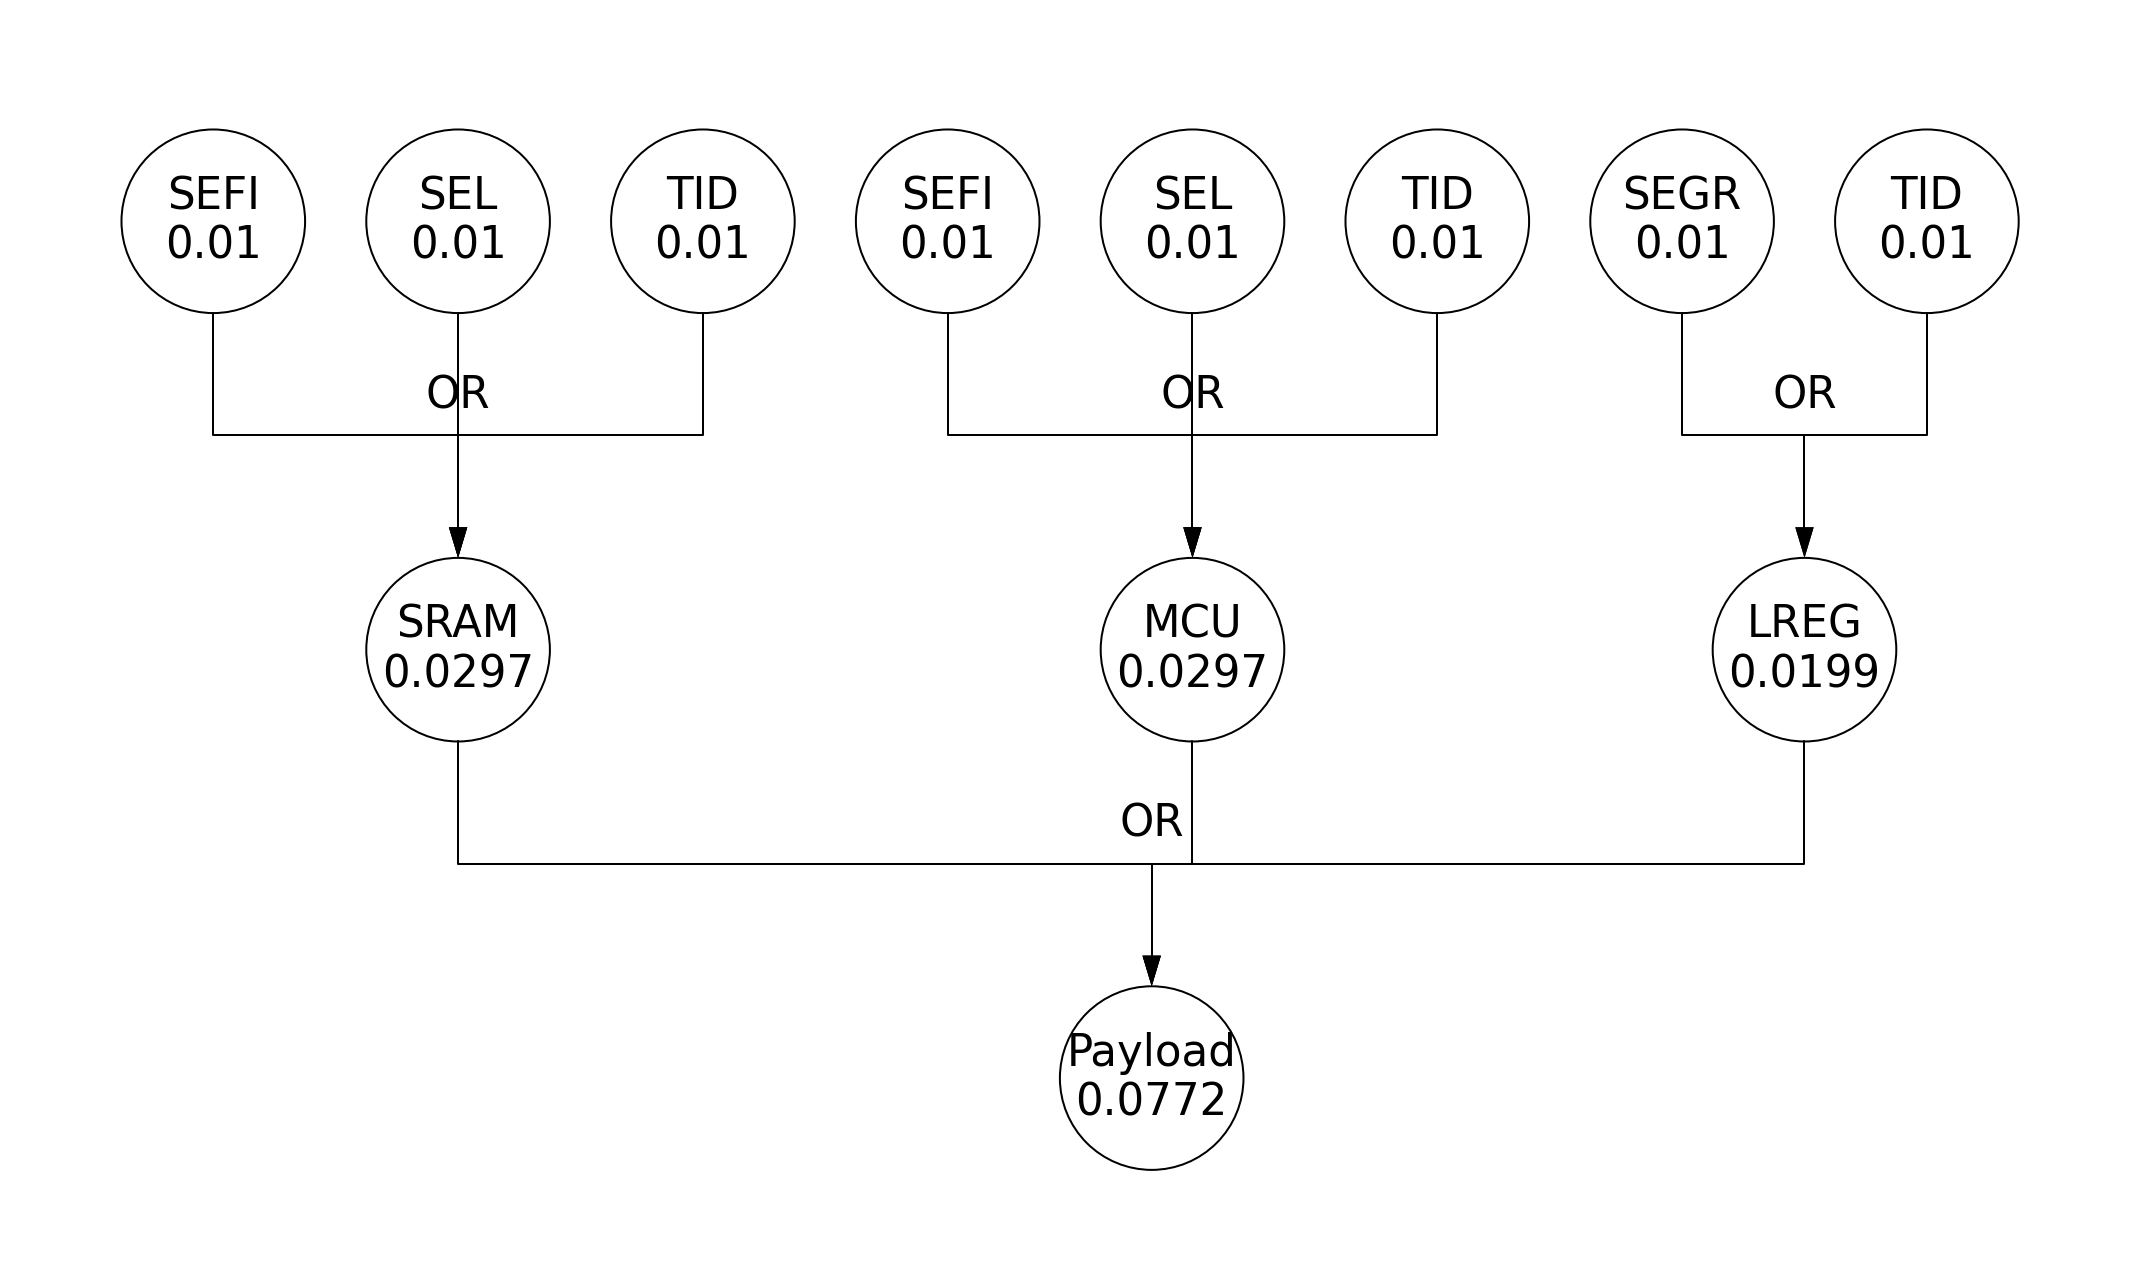

In [1]:
from lxml import etree
from radstats import diagram
diagram.decimals = 4
diagram.spacing = (2,3.5)

system = etree.parse('sys/sramsat.xml')
diagram.BN(system,'fig/diagram.png',gates=False,probs=True,times=False)

In [ ]:
# plot single orbit
import radstats.environment as env
from radstats import plot

df,details = env.get('trajectory/MISSION',0)
plot.spectra(df).show()
plot.timeline(df).show()

In [ ]:
# plot 3d flux
import numpy as np
x = [float(i.split(' ')[1]) for i in details['tflux']['SPECTRUM']]
y = df['Time (hrs)'].values
z = df[details['tflux']['SPECTRUM']].values
z[z < 0.01] = 0.01
z = np.log(z)

import plotly.graph_objects as go

from radstats import plot

fig = go.Figure(go.Surface(x=x,y=y,z=z))
fig.update_layout(scene={
    'xaxis':{'type':'log','title':'Energy (MeV)'},
    'yaxis':{'title':'Time (hrs)'},
    'zaxis':{'title':'log[Flux (pfu)]'},
    'aspectratio':{'x':2,'y':6,'z':1}})
fig.update_layout(plot.layout)
fig.show()

In [ ]:
# plot cross sections
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.special import erf

from radstats import plot, models

def weibull(x,sat,x0,w,s):
    y = sat * (1 - np.exp(-np.power((x - x0) / w,s)))
    y[y < 0] = 0
    return y

def lognormal(x,mean,stdev):
    y = (1/2) * (1 + erf((np.log(x) - mean) / (stdev * np.sqrt(2))))
    return y

def cross_sections(events):
    figs = []
    titles = []
    line = ['solid', 'dot', 'dash', 'longdash', 'dashdot', 'longdashdot']
    for source in events:
        fig = go.Figure()
        if source == 'GCR':
            titles.append('Cross Section (cm2) vs. LET (MeV-cm2/mg)')
            x = np.geomspace(0.1,1e3,1000)
            f = weibull
            yscale = 'log'
        elif source == 'Protons':
            titles.append('Cross Section (cm2) vs. Energy (MeV)')
            x = np.geomspace(0.1,1e3,1000)
            f = weibull
            yscale = 'log'
        elif source == 'Dose':
            titles.append('Failure Probability vs. TID (krad)')
            x = np.geomspace(0.1,1e3,1000)
            f = lognormal
            yscale = 'linear'
        l = 0
        for event in events[source]:
            params = [events[source][event][key] for key in events[source][event].keys()]
            fig.add_trace(go.Scatter(x=x,y=f(x,*params),line={'dash':line[l]})); l += 1
        fig.update_xaxes(type='log',exponentformat='E')
        fig.update_yaxes(type=yscale,exponentformat='E')
        figs.append(fig)
        fig = plot.rows(figs,titles=titles,sharex=False)
    return fig

fig = plot.cross_sections(models.example).update_layout(height=600,width=500)
fig.write_image('fig/cross_sections.png',scale=3)
fig.update_yaxes(dtick=1)
fig.show()

In [ ]:
# plot single orbit
from radstats import environment
from radstats import plot
from radstats import models

import pandas as pd
import numpy as np
import plotly.express as px

segment = 1
env,details = environment.get('trajectory/SPENVIS',segment)
print(details['gcr']['SPECTRUM'])
# probs = models.get_probs(env,models.example)
# fig = px.line(probs,labels={'value':'Probability','variable':'Event'},log_y=True)
# fig.update_layout(plot.layout,showlegend=True,height=250,width=600)
# fig.update_xaxes(exponentformat='E').update_yaxes(exponentformat='E')
# fig.write_image(f'trajectory/segment{segment}_probs.png',scale=3)
# fig.show()

In [ ]:
# plot entire segment
from radstats import environment, models, plot

segment = 1
env,details = environment.get('trajectory/SPENVIS',segment)
env = environment.dwell(env,days=7)
probs = models.get_probs(env,events)

import plotly.express as px

fig = px.line(probs,log_y=True,labels={'value':'Probability','variable':'Event'})
fig.update_layout(plot.layout,height=200,width=1000)
fig.update_yaxes(exponentformat='E')
fig.write_image(f'fig/segment{segment}_total.png',scale=3)
fig.show()

In [ ]:
# plot entire mission
from radstats import environment, plot
env = environment.stitch('trajectory/MISSION',[(0,7),(1,7),(2,7)])

import plotly.express as px
fig = plot.timeline(env)
fig.update_layout(height=800,width=1500)
fig.write_image('fig/mission_timeline.png',scale=3)
fig.update_yaxes(dtick=1)
fig.show()

In [ ]:
# event probabilities
from radstats import models

probs = models.get_probs(env,models.example)
probs.to_csv('data/probs.csv')

import plotly.express as px

def event_probs(probs):
    fig = px.line(probs,log_y=True,labels={'value':'Event Probability','variable':'Event'})
    fig.update_layout(layout,height=300,width=1500,showlegend=True)
    fig.update_yaxes(exponentformat='E',dtick=1)
    return fig

In [ ]:
# failure probabilities
from lxml import etree
import numpy as np
import pandas as pd

from radstats import models, bayes

def propagate(element):
    if element.get('prob','-1') == '-1':
        p = [float(propagate(child)) for child in element.xpath('*')]
        if element.get('gate') == 'OR': element.set('prob',str(bayes.OR(p)))
        if element.get('gate') == 'AND': element.set('prob',str(bayes.AND(p)))
        if element.get('gate') == 'VOTE': element.set('prob',str(bayes.VOTE(p,float(element.get('k')))))
    return element.get('prob')

def get_faults(system,probs):
    nodes = system.xpath('..//node')
    events = system.xpath('..//event')
    faults = pd.DataFrame(
        columns=[event.get('probs') for event in events] + [node.get('name') for node in nodes],
        index=probs.index
    )
    print('Time steps:',len(probs))
    for i,t in enumerate(probs.index):
        print(i,end='\r')
        for event in events:
            repair = float(event.get('repair','0').replace('\\infty','-1')) / 3600
            #require = float(event.get('require','0')) / 3600
            if repair == 0: prob = probs[event.get('probs')][t]
            elif repair > 0: prob = bayes.OR(probs[event.get('probs')][max(0,t-repair):t])
            elif repair < 0: prob = bayes.OR([
                    max(0,faults[event.get('probs')].iloc[max(0,i-1)]),
                    probs[event.get('probs')][t]
                ])
            faults.loc[t][event.get('probs')] = prob
            event.set('prob',str(prob))
        for node in nodes: node.set('prob','-1')
        propagate(system.getroot())
        for node in nodes: faults[node.get('name')][t] = float(node.get('prob',np.nan))
    return faults

system = etree.parse('sys/sramsat.xml')
probs = pd.read_csv('data/probs.csv',index_col='Time (hrs)')
faults = get_faults(system,probs)
print(faults)
faults.to_csv('data/faults.csv')

In [ ]:
import plotly.express as px
from radstats import plot
def plot_faults(faults):
    fig = px.line(faults,log_y=True,labels={'value':'Failure Probability','variable':'Element'})
    fig.update_layout(plot.layout,height=400,width=1500,showlegend=True)
    fig.update_yaxes(exponentformat='E',dtick=1)
    return fig

In [ ]:
print(faults)